# Sentiment Analysis

A significant part of `natural language processing` NLP) is the sentiment analysis of a given text - that could be as simple as an email, a comment under a YT video or whole books.
There are different methods of approaching this problem, the most common ones are `VADER` and `BERT` (or Roberta pretrained models).

Let's compare them using Amazon Reviews!


## Importing stuff and reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./datasets/Reviews.csv")
df = df.head(1000)

In [2]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Let's take a quick look at the data at hand - how many times do we have what score?

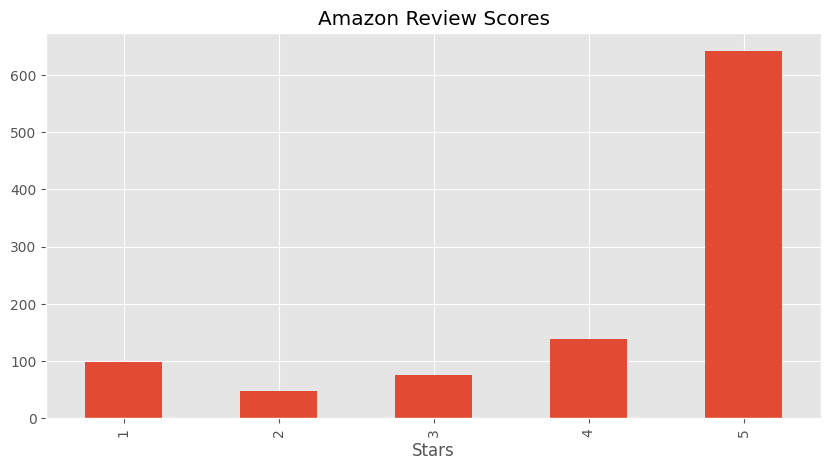

In [3]:
plt.style.use("ggplot")

axis = df["Score"].value_counts().sort_index().plot(kind="bar", title="Amazon Review Scores", figsize=(10, 5))
axis.set_xlabel("Stars")
plt.show()

So, there are a lot of 5 star reviews with a steady decline and another uptick at the 1 star level.

## NLTK action

We could try just throwing the reviews as they are at the computer, but that might not be useful. Sometimes things get abbr., sometimes they are not. Or aren't.  

### Tokenization

First we split the sentences in seperate tokens.

In [4]:
example_sentence = df["Text"][450]
print(example_sentence)

I subscribed to these - one case every three months. That comes out to about $5 a month for the convenience of having my favorite chips handy whenever I want. Because it seems Frito-Lay has managed to crowd out every other chip vendor from pretty much all my local stores this is the best way to ensure a steady supply of the items I want rather than the items Frito-Lay wants me to have. The two ounce bags are larger than you might be used to buying at the Subway (for example) which I find works very well - they're large enough to be a good snack on their own, or you can even share a single bag over lunch. The size is perfect for ensuring these fantastically crunchy chips are always fresh - no chip clip needed!<br /><br />The only problem? I subscribed to four cases a year and having these yummy chips always in the pantry makes it really easy to increase ones Kettle chip consumption. Definitely have to hide the case from the kids!


In [5]:
import nltk

In [6]:
tokenized_sentence = nltk.word_tokenize(example_sentence)
print(tokenized_sentence)

['I', 'subscribed', 'to', 'these', '-', 'one', 'case', 'every', 'three', 'months', '.', 'That', 'comes', 'out', 'to', 'about', '$', '5', 'a', 'month', 'for', 'the', 'convenience', 'of', 'having', 'my', 'favorite', 'chips', 'handy', 'whenever', 'I', 'want', '.', 'Because', 'it', 'seems', 'Frito-Lay', 'has', 'managed', 'to', 'crowd', 'out', 'every', 'other', 'chip', 'vendor', 'from', 'pretty', 'much', 'all', 'my', 'local', 'stores', 'this', 'is', 'the', 'best', 'way', 'to', 'ensure', 'a', 'steady', 'supply', 'of', 'the', 'items', 'I', 'want', 'rather', 'than', 'the', 'items', 'Frito-Lay', 'wants', 'me', 'to', 'have', '.', 'The', 'two', 'ounce', 'bags', 'are', 'larger', 'than', 'you', 'might', 'be', 'used', 'to', 'buying', 'at', 'the', 'Subway', '(', 'for', 'example', ')', 'which', 'I', 'find', 'works', 'very', 'well', '-', 'they', "'re", 'large', 'enough', 'to', 'be', 'a', 'good', 'snack', 'on', 'their', 'own', ',', 'or', 'you', 'can', 'even', 'share', 'a', 'single', 'bag', 'over', 'lunc

In this case the difference is not that big. But if we take a close look at the separation of `they're` to `they'` and `'re` - that's what's needed. 

### Part-of-speech tagging

In the next step we can tag the individual tokens to their respective part of speech.

In [7]:
tagged_tokens = nltk.pos_tag(tokenized_sentence)
tagged_tokens[:25]

[('I', 'PRP'),
 ('subscribed', 'VBD'),
 ('to', 'TO'),
 ('these', 'DT'),
 ('-', ':'),
 ('one', 'CD'),
 ('case', 'NN'),
 ('every', 'DT'),
 ('three', 'CD'),
 ('months', 'NNS'),
 ('.', '.'),
 ('That', 'DT'),
 ('comes', 'VBZ'),
 ('out', 'RP'),
 ('to', 'TO'),
 ('about', 'IN'),
 ('$', '$'),
 ('5', 'CD'),
 ('a', 'DT'),
 ('month', 'NN'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('convenience', 'NN'),
 ('of', 'IN'),
 ('having', 'VBG')]

Some of the tags here are for example:
* NN --> Noun
* DT --> Determiner
* VB --> Verb
* JJ --> Adjective

A full list of tags can be seen [here](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html).

Now on to chunking the tokens!

In [8]:
chunked_entities = nltk.chunk.ne_chunk(tagged_tokens)
chunked_entities.pprint()

(S
  I/PRP
  subscribed/VBD
  to/TO
  these/DT
  -/:
  one/CD
  case/NN
  every/DT
  three/CD
  months/NNS
  ./.
  That/DT
  comes/VBZ
  out/RP
  to/TO
  about/IN
  $/$
  5/CD
  a/DT
  month/NN
  for/IN
  the/DT
  convenience/NN
  of/IN
  having/VBG
  my/PRP$
  favorite/JJ
  chips/NNS
  handy/VBP
  whenever/WRB
  I/PRP
  want/VBP
  ./.
  Because/IN
  it/PRP
  seems/VBZ
  Frito-Lay/NNP
  has/VBZ
  managed/VBN
  to/TO
  crowd/VB
  out/RP
  every/DT
  other/JJ
  chip/NN
  vendor/NN
  from/IN
  pretty/RB
  much/JJ
  all/DT
  my/PRP$
  local/JJ
  stores/NNS
  this/DT
  is/VBZ
  the/DT
  best/JJS
  way/NN
  to/TO
  ensure/VB
  a/DT
  steady/JJ
  supply/NN
  of/IN
  the/DT
  items/NNS
  I/PRP
  want/VBP
  rather/RB
  than/IN
  the/DT
  items/NNS
  Frito-Lay/NNP
  wants/VBZ
  me/PRP
  to/TO
  have/VB
  ./.
  The/DT
  two/CD
  ounce/NN
  bags/NNS
  are/VBP
  larger/JJR
  than/IN
  you/PRP
  might/MD
  be/VB
  used/VBN
  to/TO
  buying/VBG
  at/IN
  the/DT
  (GPE Subway/NNP)
  (/(
  for/IN
  exa

## The VADER approach

VADER is an acronym for `Valence Aware Dictionary and sEntiment Reasoner` (yeah, it's a weird one). It uses the `bag-of-word` approach which means that it analyzes the text and looks for the frequency of the words (that's the reason for the tokenization).

#### ML Sidenote

This approach is further used with a `CountVectorizer` or a `Tf-Idf-Vectorizer` - both methods look at the frequency of words to look for differences and similarities.

Let's check the `SentimentIntensityAnalyzer`:

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [10]:
sia.polarity_scores("I feel really great and happy today")

{'neg': 0.0, 'neu': 0.324, 'pos': 0.676, 'compound': 0.854}

In [11]:
sia.polarity_scores("I am grumpy and tired, leave me alone!")

{'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'compound': -0.6588}

As one might guess, the annotations mean `negative`, `neutral` and `positive` and are scores from 0 to 1. The `compound` is a calculated value, with 0.0 being a completly neutral sentence, going into -0.(...) when it's negative and +0.(...) when it's positive.
The example sentence from further up get's the following scores:

In [12]:
sia.polarity_scores(example_sentence)

{'neg': 0.034, 'neu': 0.743, 'pos': 0.223, 'compound': 0.9873}

So it's seems like it's a pretty positive review if we're just looking at the scores. Let's do some comparison against the score of the review for the whole dataframe:

In [14]:
vader_result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row["Text"]
  myId = row["Id"]
  vader_result[myId] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [15]:
# merge it to the existing df

vaders_df = pd.DataFrame(vader_result).T
vaders_df = vaders_df.reset_index().rename(columns={"index": "Id"})
vaders_df = vaders_df.merge(df, how="left")

In [16]:
vaders_df.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Plot the VADER results

Reading data like that is not that helpful, so let's plot the data to see any correlations.

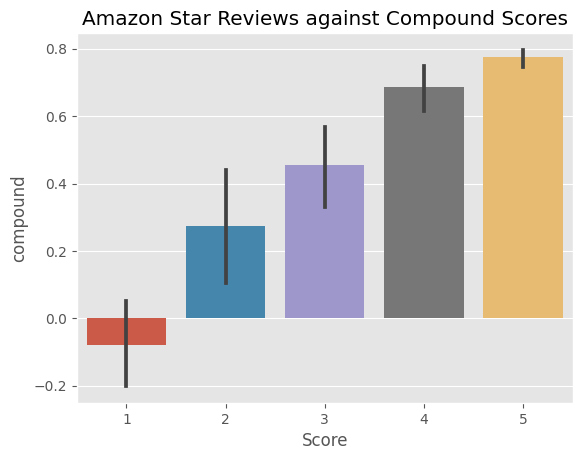

In [18]:
axes = sns.barplot(data=vaders_df, x="Score", y="compound")
axes.set_title("Amazon Star Reviews against Compound Scores")
plt.show()

Now that's what I would call a trend: The positivity of the compound scores is clearly declining with the amount of stars given by the reviewer!
Okay, that was to be expected but can we see a similar trend if we're comparing each annotation separately?

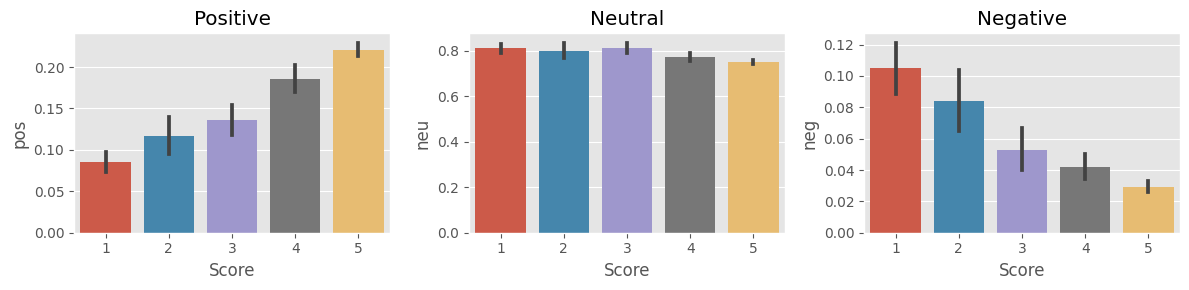

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders_df, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders_df, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders_df, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

And again, a clear trend:
1. The positive scores are (of course) highest in the 5 star reviews and lowest in the 1 star reviews with a steady decline.
2. The neutral scores are greatest in the 1 star reviews, although the difference between the groups is pretty negligable.
3. The negative scores are again highest in the 1 star reviews with very little negativity in the 5 star reviews.


## Using pretrained Roberta Models
